In [1]:
import torch

In [2]:
#x= torch.tensor(2**31,dtype=torch.int32)
#x

In [3]:
x= torch.tensor(2**31-1,dtype=torch.int32)
x

tensor(2147483647, dtype=torch.int32)

In [4]:
small = x+1

In [5]:
small -1

tensor(2147483647, dtype=torch.int32)

In [6]:

#floats
import sys
sys.float_info

sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)

In [7]:
big = sys.float_info.max
small = -big
big, small

(1.7976931348623157e+308, -1.7976931348623157e+308)

In [8]:
2*big

inf

In [9]:
small * 2

-inf

In [10]:
2*big + 2*small

nan

In [11]:
torch.tensor(3.14)

tensor(3.1400)

In [12]:
torch.rand(10,2)

tensor([[0.9133, 0.7838],
        [0.9617, 0.2266],
        [0.1871, 0.0165],
        [0.0269, 0.8363],
        [0.3276, 0.7293],
        [0.5906, 0.2309],
        [0.3378, 0.6442],
        [0.1042, 0.7728],
        [0.1597, 0.7365],
        [0.2916, 0.8341]])

In [13]:
torch.manual_seed(42)
A = torch.rand(10,2)
A

tensor([[0.8823, 0.9150],
        [0.3829, 0.9593],
        [0.3904, 0.6009],
        [0.2566, 0.7936],
        [0.9408, 0.1332],
        [0.9346, 0.5936],
        [0.8694, 0.5677],
        [0.7411, 0.4294],
        [0.8854, 0.5739],
        [0.2666, 0.6274]])

In [14]:
A.dtype

torch.float32

In [15]:
A.shape

torch.Size([10, 2])

In [16]:
#is it in main memorry or on a gpu?
A.device

device(type='cpu')

In [17]:
A.element_size() *A.nelement()

80

In [18]:
B = torch.rand(1024,1024,dtype=torch.float32)
B.element_size() *B.nelement()

4194304

In [19]:
A = torch.rand(3,3,dtype = torch.float64)#,device = 'cuda')
A.to(torch.float64)
if torch.cuda.is_available():
    print('on gpu')
    A = A.to('cuda')

In [20]:
A.reshape(1,9)

tensor([[0.0141, 0.5616, 0.8162, 0.0366, 0.4536, 0.9987, 0.9052, 0.0096, 0.7821]],
       dtype=torch.float64)

In [21]:
A.reshape(1,-1) #-1 means whatever number makes it valid

tensor([[0.0141, 0.5616, 0.8162, 0.0366, 0.4536, 0.9987, 0.9052, 0.0096, 0.7821]],
       dtype=torch.float64)

In [22]:
A.T.shape

torch.Size([3, 3])

In [23]:
A

tensor([[0.0141, 0.5616, 0.8162],
        [0.0366, 0.4536, 0.9987],
        [0.9052, 0.0096, 0.7821]], dtype=torch.float64)

In [24]:
A + 100 #element wise

tensor([[100.0141, 100.5616, 100.8162],
        [100.0366, 100.4536, 100.9987],
        [100.9052, 100.0096, 100.7821]], dtype=torch.float64)

In [25]:
torch.sigmoid(torch.tensor(0.0)) #s shapes curve from 0 to 1

tensor(0.5000)

In [26]:
torch.sigmoid(torch.tensor(99))

tensor(1.)

In [27]:
torch.sigmoid(torch.tensor(-5))

tensor(0.0067)

In [28]:
torch.sigmoid(A)

tensor([[0.5035, 0.6368, 0.6934],
        [0.5091, 0.6115, 0.7308],
        [0.7120, 0.5024, 0.6861]], dtype=torch.float64)

In [29]:
x = torch.rand(8,3)
y = torch.rand(3,5)
z = torch.rand(5,2)
x @ y @ z # @ is matrix mult

tensor([[1.9185, 2.4058],
        [0.6191, 0.7402],
        [1.6969, 2.2262],
        [2.0896, 2.5060],
        [1.0659, 1.3752],
        [1.1488, 1.4152],
        [1.7248, 2.3027],
        [1.3973, 1.5972]])

In [30]:
#want to make a prediction for each of the 10 rows
data = torch.rand(10,3)

In [31]:
#make 5 predcitions for each row
model = torch.nn.Linear(3,5)
model

Linear(in_features=3, out_features=5, bias=True)

In [32]:
model.weight

Parameter containing:
tensor([[ 0.5281,  0.2027, -0.0659],
        [-0.2103,  0.1608, -0.4322],
        [ 0.3817, -0.3892,  0.2779],
        [ 0.2653,  0.5579,  0.4429],
        [-0.1187,  0.1361,  0.2882]], requires_grad=True)

In [33]:
model.bias

Parameter containing:
tensor([ 0.3718,  0.4606,  0.5400, -0.0021, -0.2210], requires_grad=True)

In [34]:
data @ model.weight.T + model.bias

tensor([[ 0.4910,  0.3577,  0.6015,  0.2394, -0.1576],
        [ 0.6923,  0.4652,  0.3178,  0.7202, -0.0500],
        [ 0.9494,  0.0639,  0.8095,  0.9780, -0.0132],
        [ 0.5497,  0.1710,  0.6641,  0.6245,  0.0124],
        [ 0.7473,  0.2330,  0.8245,  0.3496, -0.2210],
        [ 0.8916,  0.4162,  0.5169,  0.6400, -0.1815],
        [ 0.6978,  0.2717,  0.6050,  0.6354, -0.0690],
        [ 0.6401,  0.2313,  0.5573,  0.7713,  0.0274],
        [ 0.4927,  0.3393,  0.6411,  0.2087, -0.1704],
        [ 0.6788,  0.1405,  0.7929,  0.5698, -0.0742]], grad_fn=<AddBackward0>)

In [35]:
# model is a callable object -> it works like a function
model(data)

tensor([[ 0.4910,  0.3577,  0.6015,  0.2394, -0.1576],
        [ 0.6923,  0.4652,  0.3178,  0.7202, -0.0500],
        [ 0.9494,  0.0639,  0.8095,  0.9780, -0.0132],
        [ 0.5497,  0.1710,  0.6641,  0.6245,  0.0124],
        [ 0.7473,  0.2330,  0.8245,  0.3496, -0.2210],
        [ 0.8916,  0.4162,  0.5169,  0.6400, -0.1815],
        [ 0.6978,  0.2717,  0.6050,  0.6354, -0.0690],
        [ 0.6401,  0.2313,  0.5573,  0.7713,  0.0274],
        [ 0.4927,  0.3393,  0.6411,  0.2087, -0.1704],
        [ 0.6788,  0.1405,  0.7929,  0.5698, -0.0742]],
       grad_fn=<AddmmBackward0>)

In [36]:
class Mult:
    def __init__(self, factor):
        self.factor = factor
    def __call__(self, number):
        return number * self.factor
        
double = Mult(2)
double(10)

20

In [37]:
triple = Mult(3)
triple(5)

15

In [38]:
#optimization - can be minimzation or maximazation

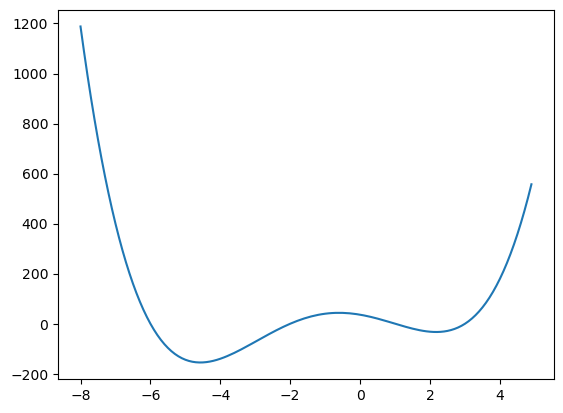

In [39]:
# we want to choose x that minimizes y
import matplotlib.pyplot as plt

def f(x):
    return (x - 1) * (x + 2) * (x - 3) * (x + 6)

x = torch.arange(-8, 5, 0.1)
y = f(x)
plt.plot(x, y)

In [40]:
x = torch.tensor(0.0,requires_grad = True)
y = f(x)
y.backward()
y

tensor(36., grad_fn=<MulBackward0>)

In [41]:
#gradient
x.grad

tensor(-24.)

In [42]:
#gradient optimizer
x = torch.tensor(0.0,requires_grad = True)
optimizer = torch.optim.SGD([x],lr = 0.1,maximize = False)
y = f(x)
y.backward()
print('y:',y)
print('x grad:',x.grad)
optimizer.step()
print('x:',x)
y = f(x)
print('y:',y)

y: tensor(36., grad_fn=<MulBackward0>)
x grad: tensor(-24.)
x: tensor(2.4000, requires_grad=True)
y: tensor(-31.0464, grad_fn=<MulBackward0>)


In [43]:
#gradient optimizer
x = torch.tensor(0.0,requires_grad = True)
optimizer = torch.optim.SGD([x],lr = 0.1,maximize = False)
for epoch in range(5):
    y = f(x)
    y.backward()
    print('y:',y)
    optimizer.step()
    optimizer.zero_grad() #sets x.grad = 0 before next loop

y: tensor(36., grad_fn=<MulBackward0>)
y: tensor(-31.0464, grad_fn=<MulBackward0>)
y: tensor(19.6193, grad_fn=<MulBackward0>)
y: tensor(279.3949, grad_fn=<MulBackward0>)
y: tensor(992228.8125, grad_fn=<MulBackward0>)


y tensor(36., grad_fn=<MulBackward0>)
y tensor(29.3194, grad_fn=<MulBackward0>)
y tensor(18.2556, grad_fn=<MulBackward0>)
y tensor(2.5687, grad_fn=<MulBackward0>)


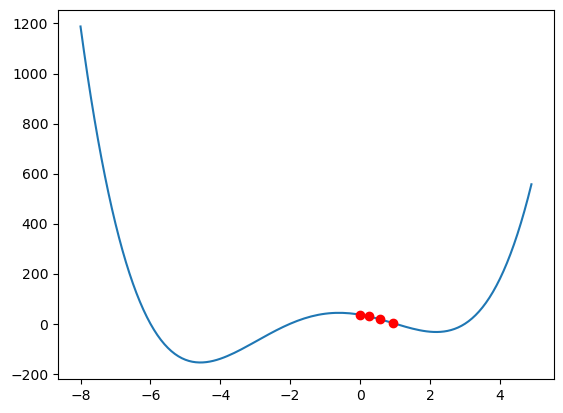

In [44]:
x = torch.arange(-8, 5, 0.1)
y = f(x)
plt.plot(x, y)



x = torch.tensor(0.0, requires_grad=True)
optimizer = torch.optim.SGD([x], lr=0.01)   # lr is learning rate

for epoch in range(4):
    y = f(x)
    plt.plot(x.detach(), y.detach(), "ro")
    y.backward()
    print("y", y)
    optimizer.step()    # doesn't set the grad, it adds to x.grad
    optimizer.zero_grad()   # set x.grad = 0 before the next loop

In [45]:
import torch
import pandas as pd
path = "https://pages.cs.wisc.edu/~harter/cs639/data/wi-stations/USW00014837.csv.gz"
df = pd.read_csv(path, names=["station", "date", "element", "value", "m", "q", "s", "obs"])

#https://pages.cs.wisc.edu/~harter/cs639/data/wi-stations/USW00014839.csv.gz

/tmp/ipykernel_849805/1724107054.py:4: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, names=["station", "date", "element", "value", "m", "q", "s", "obs"])


In [46]:
df['element'].isin(['TMIN','TMAX'])

0          True
1          True
2          True
3          True
4          True
          ...  
409846    False
409847    False
409848    False
409849    False
409850    False
Name: element, Length: 409851, dtype: bool

In [47]:
df2 = df[df['element'].isin(['TMIN','TMAX'])]
df2.head()

,station,date,element,value,m,q,s,obs
0,USW00014837,19391001,TMAX,194,NaN,NaN,X,NaN
1,USW00014837,19391002,TMAX,211,NaN,NaN,X,NaN
2,USW00014837,19391003,TMAX,233,NaN,NaN,X,NaN
3,USW00014837,19391004,TMAX,272,NaN,NaN,X,NaN
4,USW00014837,19391005,TMAX,211,NaN,NaN,X,NaN


In [48]:
#goal is to predict tmax given tmin
temps = df2.pivot(index='date',columns='element',values='value')
temps.head()

element,TMAX,TMIN
date,,
19391001,194,6
19391002,211,33
19391003,233,89
19391004,272,106
19391005,211,133


<AxesSubplot:xlabel='TMIN', ylabel='TMAX'>

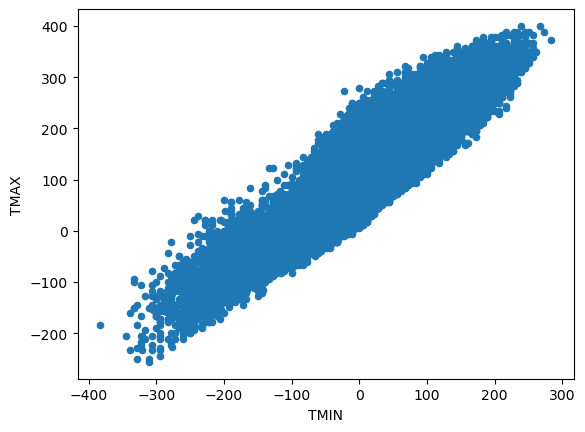

In [49]:
temps.plot.scatter(x='TMIN',y='TMAX')

In [50]:
#pytorch data:
#1. Dataset
#2. DataLoader: use dataset but provide shuffling and batching

In [51]:
x = torch.tensor(temps[['TMIN']].values, dtype = torch.float32)
y = torch.tensor(temps[['TMAX']].values, dtype = torch.float32)

In [52]:
import torch
#all data is in memory at the same time
ds = torch.utils.data.TensorDataset(x,y)
ds[1]

(tensor([33.]), tensor([211.]))

In [53]:
type(ds).__mro__

(torch.utils.data.dataset.TensorDataset,
 torch.utils.data.dataset.Dataset,
 typing.Generic,
 object)

In [54]:
class TempDS(torch.utils.data.dataset.Dataset):
    def __init__(self, path):
        df = pd.read_csv(path, names=["station", "date", "element", "value", "m", "q", "s", "obs"])
        df2 = df[df["element"].isin(["TMIN", "TMAX"])]
        temps = df2.pivot(index="date", columns="element", values="value")
        self.X = torch.tensor(temps[["TMIN"]].values, dtype=torch.float32)
        self.Y = torch.tensor(temps[["TMAX"]].values, dtype=torch.float32)
        
    def __getitem__(self, index):
        return self.X[index], self.Y[index]
    
    def __len__(self):
        return len(self.X)

ds = TempDS("https://pages.cs.wisc.edu/~harter/cs639/data/wi-stations/USW00014837.csv.gz")

/tmp/ipykernel_849805/841781102.py:3: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, names=["station", "date", "element", "value", "m", "q", "s", "obs"])


In [55]:
ds[:]

(tensor([[  6.],
         [ 33.],
         [ 89.],
         ...,
         [  0.],
         [  0.],
         [-32.]]),
 tensor([[194.],
         [211.],
         [233.],
         ...,
         [ 28.],
         [ 22.],
         [  0.]]))

In [56]:
len(ds)

30428

In [57]:
ds2 = TempDS("https://pages.cs.wisc.edu/~harter/cs639/data/wi-stations/USW00014839.csv.gz")

/tmp/ipykernel_849805/841781102.py:3: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, names=["station", "date", "element", "value", "m", "q", "s", "obs"])


In [58]:
dl = torch.utils.data.DataLoader(ds, shuffle=True, batch_size=10)

In [59]:
for x,y in dl:
    print(x)
    print(y)
    break

tensor([[  -6.],
        [-150.],
        [ -61.],
        [ 161.],
        [ -17.],
        [   0.],
        [-211.],
        [-100.],
        [ 100.],
        [-106.]])
tensor([[ 111.],
        [  17.],
        [  -6.],
        [ 278.],
        [ 150.],
        [  61.],
        [-117.],
        [  28.],
        [ 200.],
        [  89.]])


In [66]:
model = torch.nn.Linear(1, 1)
optimizer = torch.optim.SGD([model.weight, model.bias], lr=0.00001)
loss_fn = torch.nn.MSELoss()

for epoch in range(50):
    for batchx, batchy in dl:
        predictedy = model(batchx)
        loss = loss_fn(batchy, predictedy)
        loss.backward() #update weight and bias
        optimizer.step()
        optimizer.zero_grad() #set grads to 0
        # TODO: change model params based on loss
    x,y = ds[:]
    print(epoch,loss_fn(y,model(x)))

0 tensor(12933.2891, grad_fn=<MseLossBackward0>)
1 tensor(11924.3096, grad_fn=<MseLossBackward0>)
2 tensor(11164.3066, grad_fn=<MseLossBackward0>)
3 tensor(9931.1357, grad_fn=<MseLossBackward0>)
4 tensor(8901.0635, grad_fn=<MseLossBackward0>)
5 tensor(8051.0732, grad_fn=<MseLossBackward0>)
6 tensor(7658.9385, grad_fn=<MseLossBackward0>)
7 tensor(6801.9937, grad_fn=<MseLossBackward0>)
8 tensor(6290.0571, grad_fn=<MseLossBackward0>)
9 tensor(5951.3916, grad_fn=<MseLossBackward0>)
10 tensor(5520.8662, grad_fn=<MseLossBackward0>)
11 tensor(5330.8911, grad_fn=<MseLossBackward0>)
12 tensor(4849.8901, grad_fn=<MseLossBackward0>)
13 tensor(4464.1758, grad_fn=<MseLossBackward0>)
14 tensor(4162.4160, grad_fn=<MseLossBackward0>)
15 tensor(3962.8240, grad_fn=<MseLossBackward0>)
16 tensor(3720.9160, grad_fn=<MseLossBackward0>)
17 tensor(3568.9424, grad_fn=<MseLossBackward0>)
18 tensor(3446.1340, grad_fn=<MseLossBackward0>)
19 tensor(3234.2434, grad_fn=<MseLossBackward0>)
20 tensor(3099.9807, grad_f

KeyboardInterrupt: 

In [67]:
model.weight, model.bias

(Parameter containing:
 tensor([[1.0744]], requires_grad=True),
 Parameter containing:
 tensor([81.9020], requires_grad=True))

In [72]:
tmin = torch.arange(-400,300,dtype=torch.float32)
predicted_tmax = model(tmin.reshape(-1,1)).reshape(-1)

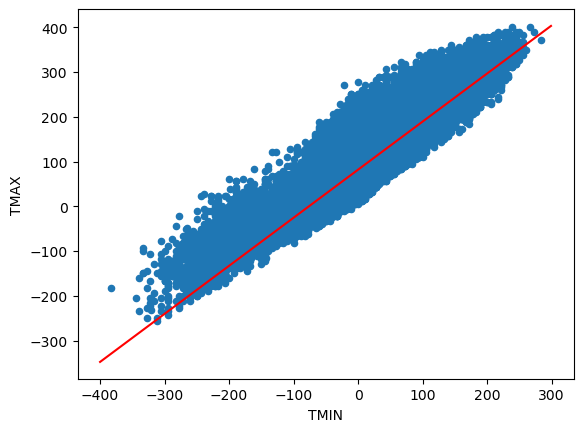

In [75]:
import matplotlib.pyplot as plt
temps.plot.scatter(x='TMIN',y='TMAX')
plt.plot(tmin,predicted_tmax.detach(),'r')